In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scikit_posthocs as sp
import pandas as pd
import numpy as np

I will be leaving this notebook raw, with some commentary. An organized overview of the problem can be found on the accompanying PDF. I have deleted all the pre-processing and table joining code so that there is less clutter. I also have chosen to keep everything within one notebook, so that all the code can be sent as a single file; I would have preferred a more organized and modular approach to the use of custom classes / functions. But, here, functions are defined as they are about to be used. 

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

I have merged statistical_inference.csv and human_violation_metrics.csv into a single file and that's what I am importing.

In [261]:
inference_pipeline_df = pd.read_csv("inference_pipeline_df.csv")

After removing 0 variance columns and adding a datatime column based on the logs, we end up with the following list:

In [265]:
columns = [
    "run",
    "pipeline",
    "total_predicted_violations",
    "found_matches",
    "total_false_positives",
    "total_false_negatives",
    "precision",
    "recall",
    "f1_score",
    "avg_violation_index_consistency_score",
    "avg_overlap_score",
    "avg_rule_similarity_score",
    "avg_category_match",
    "avg_explanation_similarity_score",
    "avg_correction_similarity_score",
    "avg_weighted_score" "date",
    "total_tokens",
    "total_prompt_tokens",
    "total_completion_tokens",
    "total_time",
    "total_completion_time",
    "total_api_calls",
    "total_costs",
    "avg_total_tokens",
    "avg_prompt_tokens",
    "avg_completion_tokens",
    "avg_total_time",
    "avg_completion_time",
    "avg_api_calls",
    "avg_costs",
]

We will be pruning it further. Our analysis will concern itself with the usual derived metrics ['precision', 'recall', 'f1_score'] and the 'total_cost' metric. 'total_cost' is almost colinear with  other columns of interest in the inference statistics dataframe, so we will be taking it as our main reference to that table.

<Axes: >

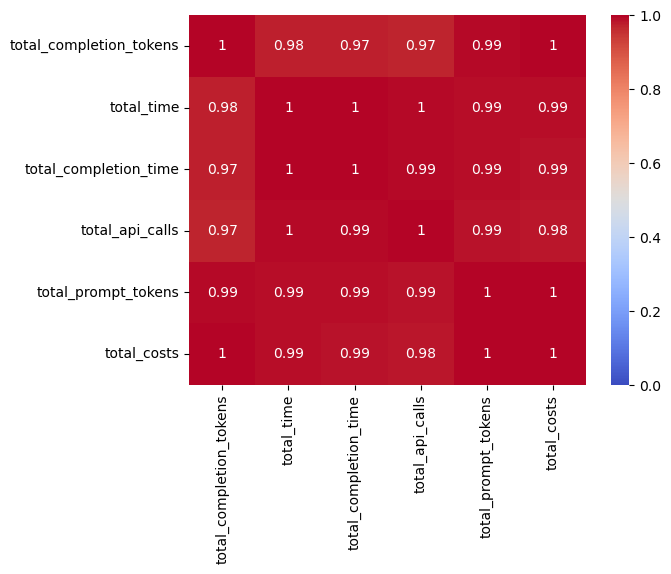

In [266]:
sns.heatmap(
    inference_pipeline_df[
        [
            "total_completion_tokens",
            "total_time",
            "total_completion_time",
            "total_api_calls",
            "total_prompt_tokens",
            "total_costs",
        ]
    ].corr(),
    annot=True,
    cmap="coolwarm",
    vmin=0,
    vmax=1,
)

## Are there significant differences in the chosen metric between the inference pipeline that are being compared? 

Since we are dealing with metrics that are averaged accross many runs, we must be careful with how we compare them between inference pipelines. We are in fact comparing distributions, with their own mean and variance. Given the uncertainty innate in machine learning, we want a new result to be considered 'better' only if we can be assured that it is at some statistically significant distance from our previous result.

Most of the data has a distribution that looks like this. This is the reason we are using non-parametric methods.

<Axes: xlabel='recall', ylabel='Count'>

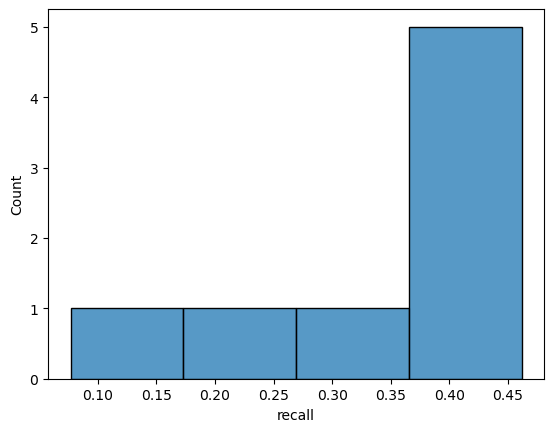

In [267]:
sns.histplot(
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "zeroshot-index@3.0.0"
    ]["recall"]
)

kruskal result: KruskalResult(statistic=5.3779052421702165, pvalue=0.14612637063643139)


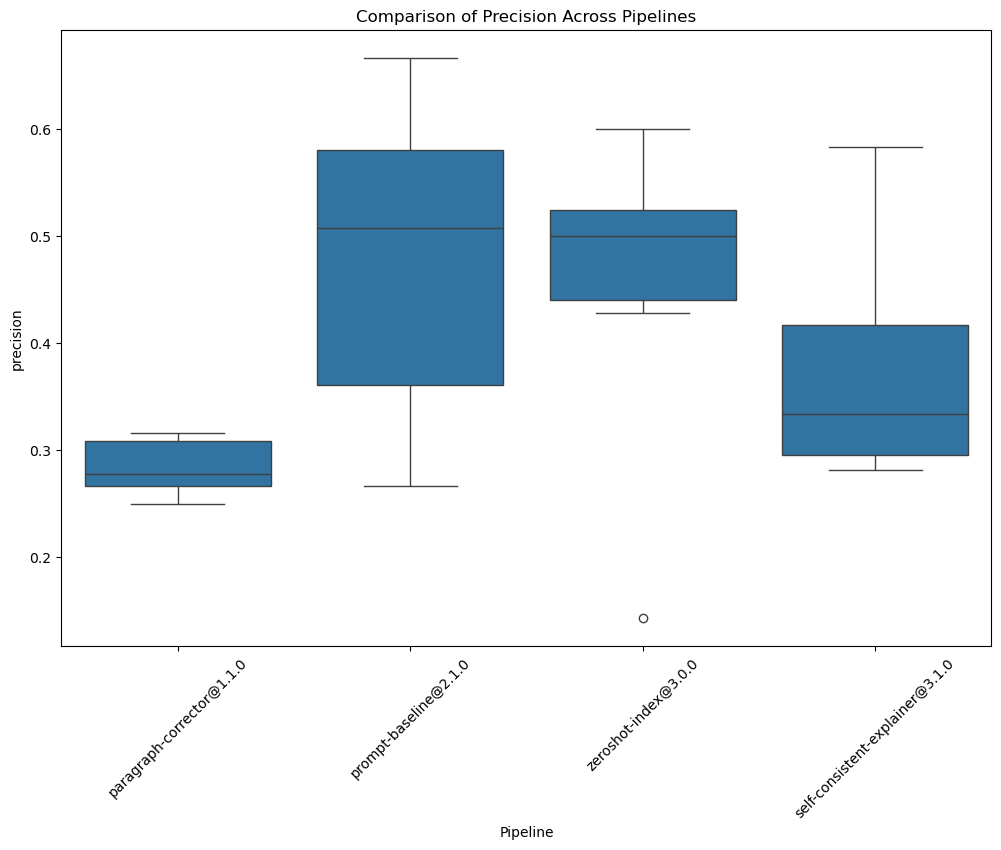

In [268]:
kruskal_result = stats.kruskal(
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "paragraph-corrector@1.1.0"
    ]["f1_score"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "prompt-baseline@2.1.0"
    ]["f1_score"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "self-consistent-explainer@3.1.0"
    ]["f1_score"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "zeroshot-index@3.0.0"
    ]["f1_score"],
)

print("kruskal result:", kruskal_result)

plt.figure(figsize=(12, 8))
sns.boxplot(x="pipeline_x", y="precision", data=inference_pipeline_df)
plt.title("Comparison of Precision Across Pipelines")
plt.xlabel("Pipeline")
plt.ylabel("precision")
plt.xticks(rotation=45)
plt.show()

kruskal result: KruskalResult(statistic=5.3779052421702165, pvalue=0.14612637063643139)


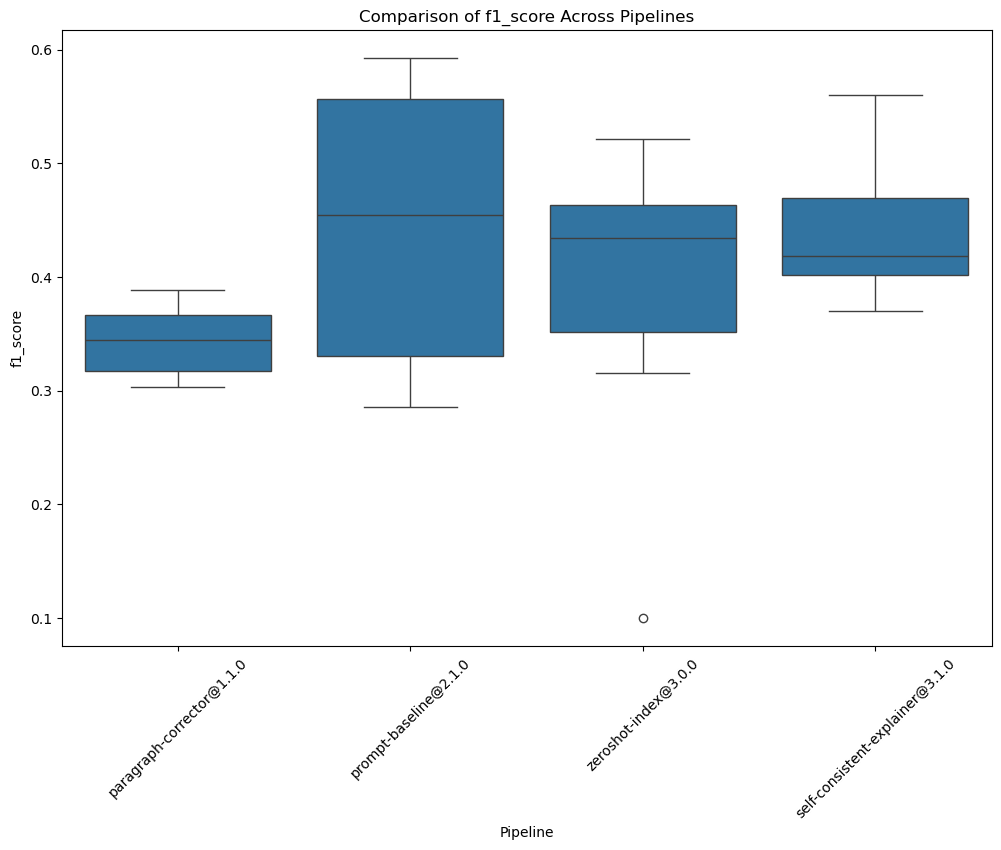

In [269]:
kruskal_result = stats.kruskal(
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "paragraph-corrector@1.1.0"
    ]["f1_score"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "prompt-baseline@2.1.0"
    ]["f1_score"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "self-consistent-explainer@3.1.0"
    ]["f1_score"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "zeroshot-index@3.0.0"
    ]["f1_score"],
)

print("kruskal result:", kruskal_result)

plt.figure(figsize=(12, 8))
sns.boxplot(x="pipeline_x", y="f1_score", data=inference_pipeline_df)
plt.title("Comparison of f1_score Across Pipelines")
plt.xlabel("Pipeline")
plt.ylabel("f1_score")
plt.xticks(rotation=45)
plt.show()

kruskal result: KruskalResult(statistic=8.77462360496946, pvalue=0.032442432273897134)


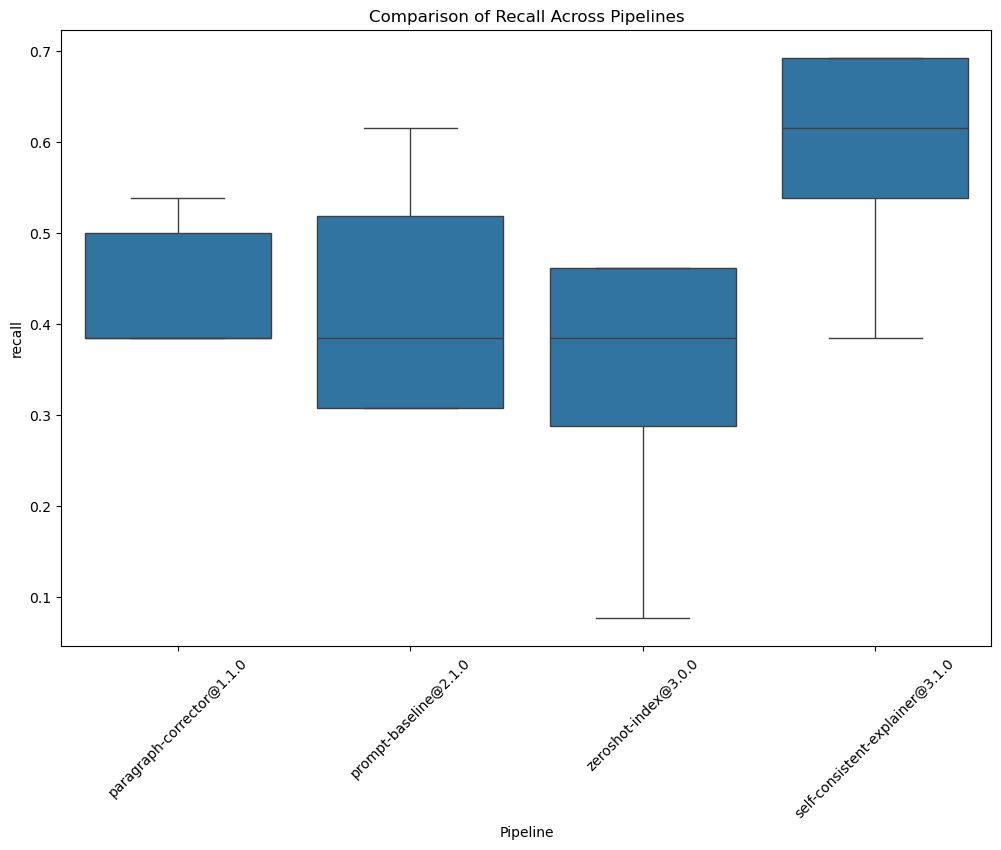

In [270]:
kruskal_result = stats.kruskal(
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "paragraph-corrector@1.1.0"
    ]["recall"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "prompt-baseline@2.1.0"
    ]["recall"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "self-consistent-explainer@3.1.0"
    ]["recall"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "zeroshot-index@3.0.0"
    ]["recall"],
)

print("kruskal result:", kruskal_result)

plt.figure(figsize=(12, 8))
sns.boxplot(x="pipeline_x", y="recall", data=inference_pipeline_df)
plt.title("Comparison of Recall Across Pipelines")
plt.xlabel("Pipeline")
plt.ylabel("recall")
plt.xticks(rotation=45)
plt.show()

kruskal result: KruskalResult(statistic=24.33333333333333, pvalue=2.128056919840488e-05)


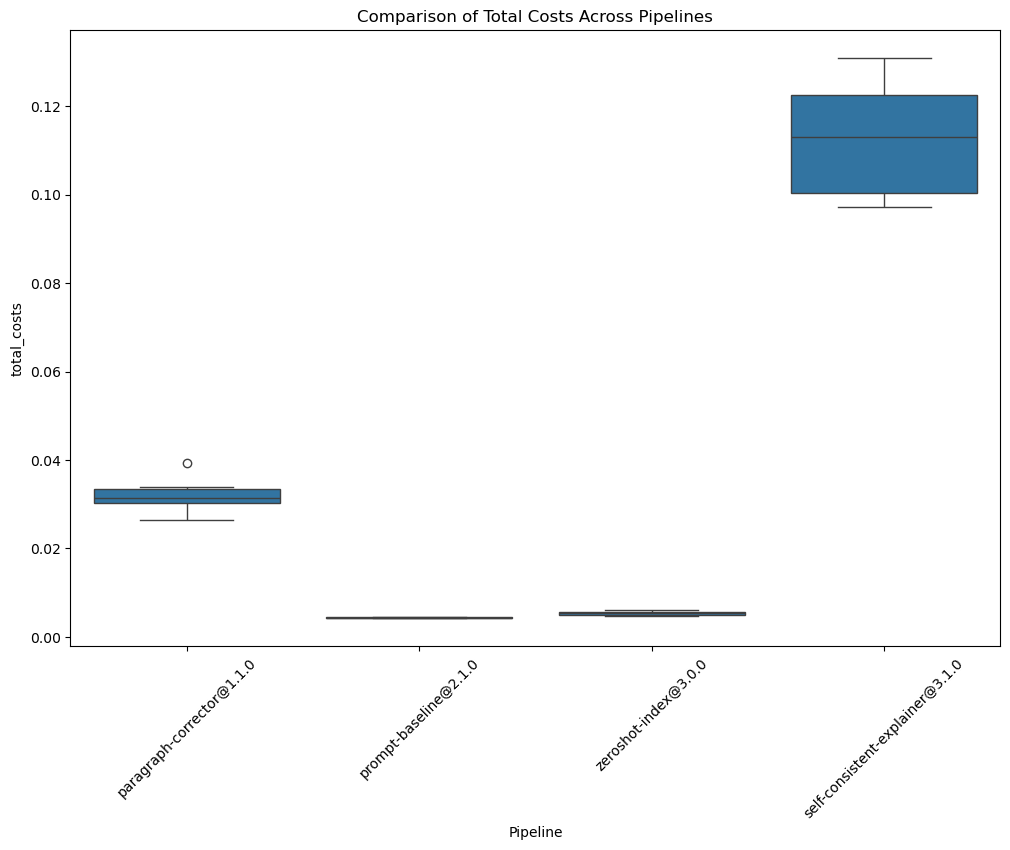

In [271]:
kruskal_result = stats.kruskal(
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "paragraph-corrector@1.1.0"
    ]["total_costs"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "prompt-baseline@2.1.0"
    ]["total_costs"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "self-consistent-explainer@3.1.0"
    ]["total_costs"],
    inference_pipeline_df[
        inference_pipeline_df["pipeline_x"] == "zeroshot-index@3.0.0"
    ]["total_costs"],
)

print("kruskal result:", kruskal_result)

plt.figure(figsize=(12, 8))
sns.boxplot(x="pipeline_x", y="total_costs", data=inference_pipeline_df)
plt.title("Comparison of Total Costs Across Pipelines")
plt.xlabel("Pipeline")
plt.ylabel("total_costs")
plt.xticks(rotation=45)
plt.show()

In [272]:
for score in ["f1_score", "recall", "precision", "total_costs"]:
    kruskal_result = stats.kruskal(
        inference_pipeline_df[
            inference_pipeline_df["pipeline_x"] == "paragraph-corrector@1.1.0"
        ][score],
        inference_pipeline_df[
            inference_pipeline_df["pipeline_x"] == "prompt-baseline@2.1.0"
        ][score],
        inference_pipeline_df[
            inference_pipeline_df["pipeline_x"] == "self-consistent-explainer@3.1.0"
        ][score],
        inference_pipeline_df[
            inference_pipeline_df["pipeline_x"] == "zeroshot-index@3.0.0"
        ][score],
    )
    print(f"{score} {kruskal_result}")

f1_score KruskalResult(statistic=5.3779052421702165, pvalue=0.14612637063643139)
recall KruskalResult(statistic=8.77462360496946, pvalue=0.032442432273897134)
precision KruskalResult(statistic=9.26396050925724, pvalue=0.02597965504024555)
total_costs KruskalResult(statistic=24.33333333333333, pvalue=2.128056919840488e-05)


In [273]:
data = {
    "Metric": ["f1_score", "recall", "precision", "total_costs"],
    "Statistic": [
        5.3779052421702165,
        8.77462360496946,
        9.26396050925724,
        24.33333333333333,
    ],
    "p-value": [
        0.14612637063643139,
        0.032442432273897134,
        0.02597965504024555,
        2.128056919840488e-05,
    ],
}

kruskal_df = pd.DataFrame(data)

In [274]:
kruskal_df = kruskal_df.set_index("Metric")

In [275]:
kruskal_df

,Statistic,p-value
Metric,,
f1_score,5.377905,0.146126
recall,8.774624,0.032442
precision,9.263961,0.025980
total_costs,24.333333,0.000021


## If I find a significant difference in a group of pipelines, can I easily identify which ones are actually significantly different pairwise?

So, we did find that are significant differentes withing a group. But which pairs of pipelines are actually different between themselves?

For that, we will be using a posthoc (after the fact the we found the difference) Dunn's test.

In [276]:
# Apply Dunn's test
columns = ["total_costs", "recall", "f1_score", "precision"]
posthoc_results = {}

for measure in columns:
    posthoc_result = sp.posthoc_dunn(
        inference_pipeline_df,
        val_col=measure,
        group_col="pipeline_x",
        p_adjust="bonferroni",
    )
    posthoc_results[measure] = posthoc_result

In [277]:
posthoc_results["recall"]

,paragraph-corrector@1.1.0,prompt-baseline@2.1.0,self-consistent-explainer@3.1.0,zeroshot-index@3.0.0
paragraph-corrector@1.1.0,1.000000,1.000000,0.464313,1.000000
prompt-baseline@2.1.0,1.000000,1.000000,0.240271,1.000000
self-consistent-explainer@3.1.0,0.464313,0.240271,1.000000,0.022246
zeroshot-index@3.0.0,1.000000,1.000000,0.022246,1.000000


The outcome is a dictionary of correlation matrices with the differences between the pipelines, for each metric.

We can see bellow how the pipelines are related in the 'f1_score', 'total_costs' and 'recall' space. 

<Axes: >

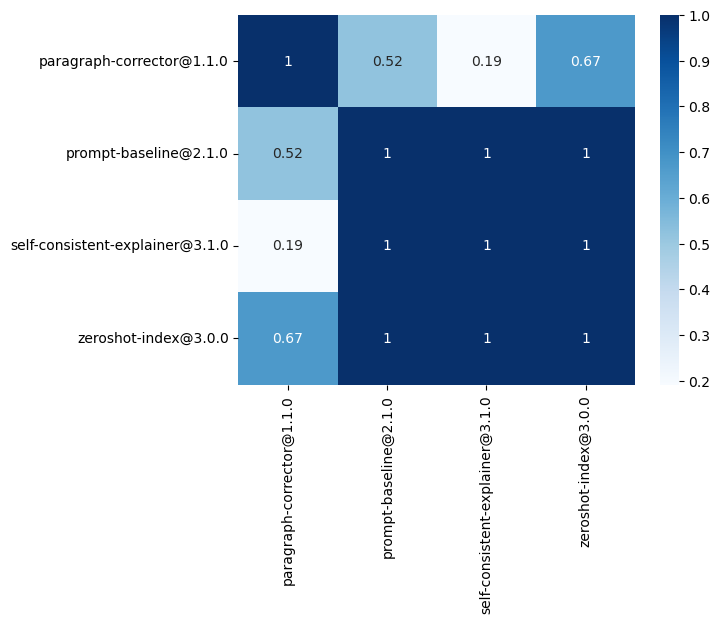

In [278]:
sns.heatmap(posthoc_results["f1_score"], cmap="Blues", annot=True)

<Axes: >

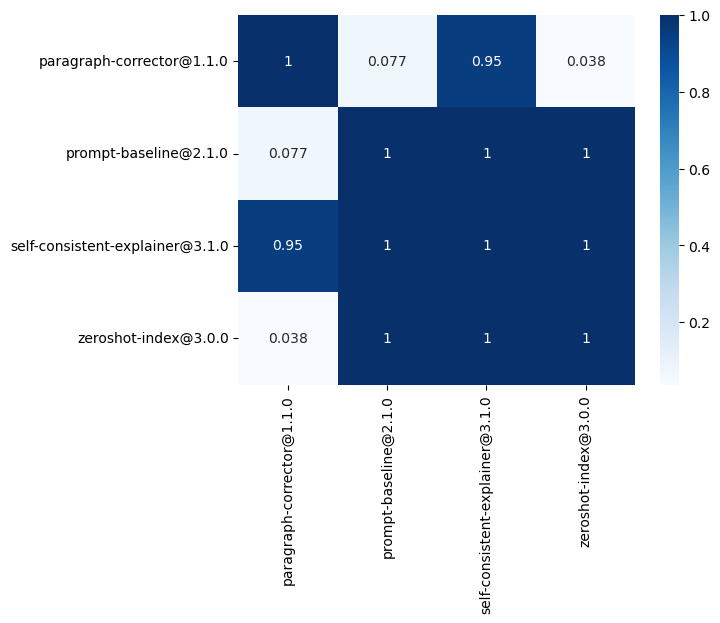

In [279]:
sns.heatmap(posthoc_results["precision"], cmap="Blues", annot=True)

<Axes: >

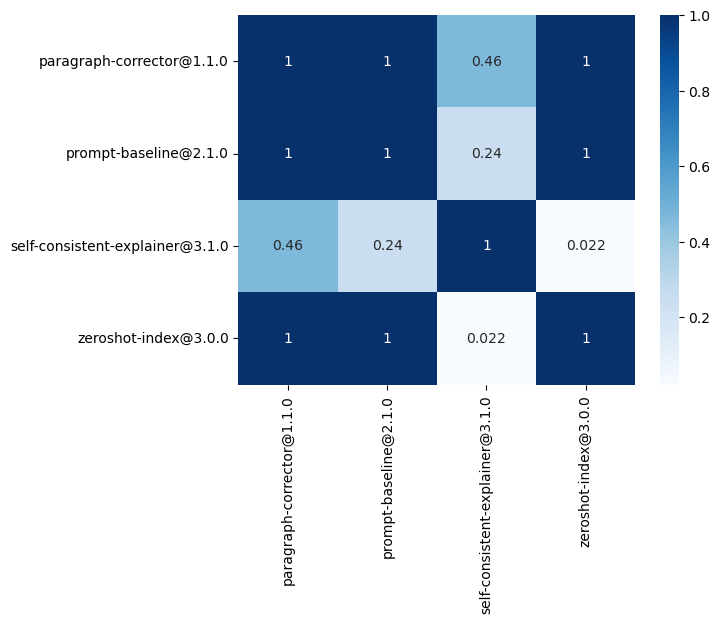

In [280]:
sns.heatmap(posthoc_results["recall"], cmap="Blues", annot=True)

<Axes: >

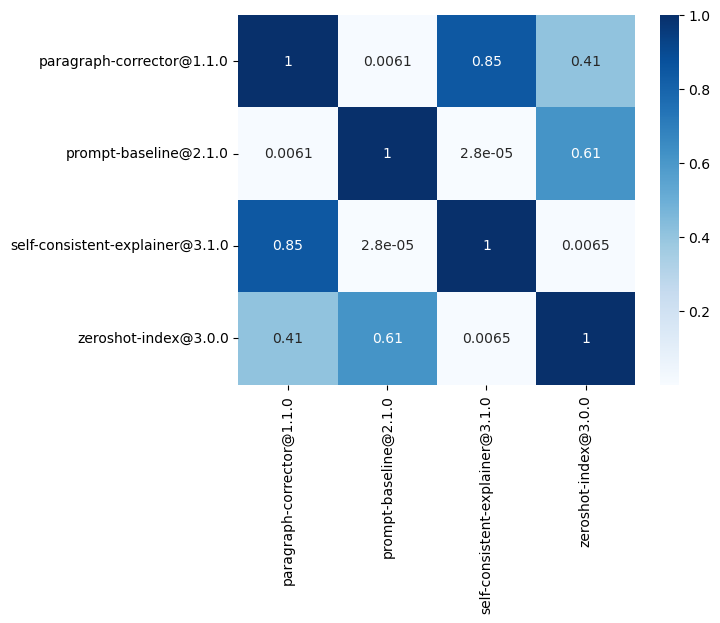

In [281]:
sns.heatmap(posthoc_results["total_costs"], cmap="Blues", annot=True)

## Given that there is a difference, can we put a number to it? 

All we have done so far is answering the categorical question of the presence or not of a significant difference. But, let's say that we keep churning out new models, each one better than the other. If we want to keep comparing it to the baseline naive model, knowing that there is a significant difference won't be enough; we actually need a number. 

The number I've chosen is a modified version Cohen's D. Again, if we simply compare the averages over a number of runs for differente pipelines, we may end up being too simplistic, given that we are, in fact, comparing distributions with difference variances.

In [290]:
# Gamma effect converted from R.
def pooled(x, y, func):
    nx = len(x)
    ny = len(y)
    return np.sqrt(((nx - 1) * func(x) ** 2 + (ny - 1) * func(y) ** 2) / (nx + ny - 2))


def hdmedian(x):
    return np.median(x)


def hdmad(x):
    return 1.4826 * np.median(np.abs(x - np.median(x)))


def phdmad(x, y):
    return pooled(x, y, hdmad)


def gamma_effect_size(x, y, prob):
    return (np.quantile(y, prob) - np.quantile(x, prob)) / phdmad(x, y)

In [291]:
# inference_pipeline_df['pipeline_x'].unique()

array(['paragraph-corrector@1.1.0', 'prompt-baseline@2.1.0',
       'zeroshot-index@3.0.0', 'self-consistent-explainer@3.1.0'],
      dtype=object)

In [292]:
pipeline_base = "prompt-baseline@2.1.0"  # This is our base of comparison
pipeline_2 = "zeroshot-index@3.0.0"
# ideal_recall_df =  pd.DataFrame(np.ones((len(inference_pipeline_df[inference_pipeline_df['pipeline_x']=='prompt-baseline@2.1.0']['recall']), 1)), columns=['ideal_recall_d_value'])

In [293]:
total_cost_gamma = gamma_effect_size(
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_base][
        "total_costs"
    ],
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_2][
        "total_costs"
    ],
    prob=0.5,
)
precision_gamma = gamma_effect_size(
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_base][
        "precision"
    ],
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_2][
        "precision"
    ],
    prob=0.5,
)
recall_gamma = gamma_effect_size(
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_base][
        "recall"
    ],
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_2]["recall"],
    prob=0.5,
)
f1_score_gamma = gamma_effect_size(
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_base][
        "f1_score"
    ],
    inference_pipeline_df[inference_pipeline_df["pipeline_x"] == pipeline_2][
        "f1_score"
    ],
    prob=0.5,
)

In [294]:
print(
    f"Baseline pipeline: {pipeline_base}\nComparison pipeline: {pipeline_2}\nTotal Cost Gamma: {total_cost_gamma}\nPrecision Gamma: {precision_gamma}\nRecall Gamma: {recall_gamma}\nF1 Score Gamma: {f1_score_gamma}\n"
)

Baseline pipeline: prompt-baseline@2.1.0
Comparison pipeline: zeroshot-index@3.0.0
Total Cost Gamma: 2.0881669351193266
Precision Gamma: -0.05962076280782823
Recall Gamma: 0.0
F1 Score Gamma: -0.1357272816279442



In [287]:
gamma_to_baseline = {
    "Metric": ["Total Cost Gamma", "Precision Gamma", "Recall Gamma", "F1 Score Gamma"],
    "paragraph-corrector@1.1.0_gamma_value": [
        13.101380379942842,
        -1.9088334932973705,
        0.0,
        -0.8818701889801293,
    ],
    "'zeroshot-index@3.0.0'_gamma_value": [
        2.0881669351193266,
        -0.05962076280782823,
        0.0,
        -0.1357272816279442,
    ],
    "self-consistent-explainer@3.1.0_gamme_value": [
        8.927705097731618,
        -1.3134376840644653,
        2.0234722784297863,
        -0.27334966737799715,
    ],
}

# Create a dataframe for the new data
gamma_df = pd.DataFrame(gamma_to_baseline)

In [289]:
pd.DataFrame(gamma_df.set_index("Metric"))

,paragraph-corrector@1.1.0_gamma_value,'zeroshot-index@3.0.0'_gamma_value,self-consistent-explainer@3.1.0_gamme_value
Metric,,,
Total Cost Gamma,13.101380,2.088167,8.927705
Precision Gamma,-1.908833,-0.059621,-1.313438
Recall Gamma,0.000000,0.000000,2.023472
F1 Score Gamma,-0.881870,-0.135727,-0.273350
